In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os


In [2]:
dataset_dir = r"D:\SIH\dataset\train"
img_size = (224, 224)
batch_size = 32


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 14529 images belonging to 2 classes.
Found 3631 images belonging to 2 classes.


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [5]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
checkpoint = ModelCheckpoint(
    filepath=r"D:\SIH\tomato_leaf_model_best.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [7]:
epochs = 5  # fewer epochs for faster testing

history = model.fit(
    train_generator,
    steps_per_epoch=100,       # only 100 batches per epoch for testing
    validation_data=validation_generator,
    validation_steps=20,       # only 20 batches for validation
    epochs=epochs,
    callbacks=[checkpoint, earlystop]
)


C:\Users\iassu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9176 - loss: 0.2135      
Epoch 1: val_accuracy improved from None to 0.88594, saving model to D:\SIH\tomato_leaf_model_best.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9494 - loss: 0.1299 - val_accuracy: 0.8859 - val_loss: 0.2502
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9770 - loss: 0.0663     
Epoch 2: val_accuracy improved from 0.88594 to 0.90312, saving model to D:\SIH\tomato_leaf_model_best.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9794 - loss: 0.0581 - val_accuracy: 0.9031 - val_loss: 0.2038
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.9758 - loss: 0.0646  
Epoch 3: val_accuracy improved from 0.90312 to 0.96875, saving model to D:\SIH\tomato_leaf_model_best.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9759 - loss: 0.0610 - val_accuracy: 0.9688 - val_loss: 0.0780
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 943ms/step - accuracy: 0.9838 - loss: 0.0492 
Epoch 4: val_accuracy did not improve from 0.96875
100/100 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9852 - loss: 0.0452 - val_accuracy: 0.9500 - val_loss: 0.1371
Epoch 5/5
 55/100 ━━━━━━━━━━━━━━━━━━━━ 35s 784ms/step - accuracy: 0.9781 - loss: 0.0608

C:\Users\iassu\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 5: val_accuracy did not improve from 0.96875
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 634ms/step - accuracy: 0.9761 - loss: 0.0614 - val_accuracy: 0.9609 - val_loss: 0.0878


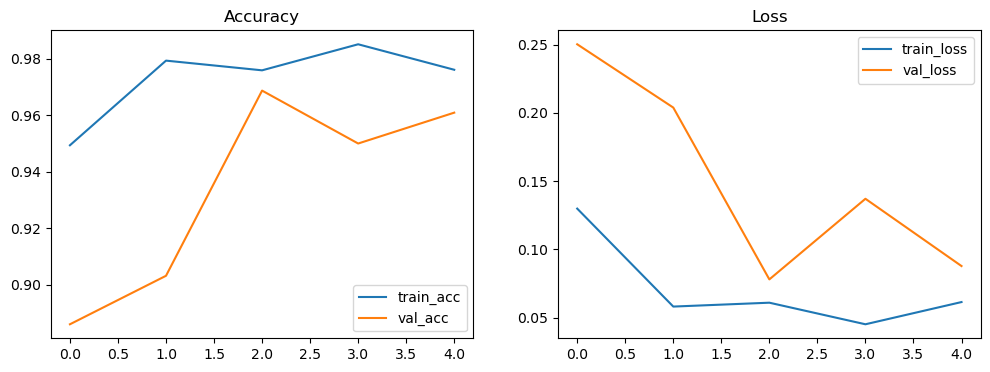

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()


In [9]:
model.save(r"D:\SIH\tomato_leaf_model_final.h5")
print("Model saved successfully in D:\\SIH")


Model saved successfully in D:\SIH
